In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'PlantVillage_Split/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.7902834  0.7946733  0.83827895]
  [0.7656431  0.77565175 0.8162141 ]
  [0.75472677 0.7664915  0.8017856 ]
  ...
  [0.80450934 0.7849015  0.8005878 ]
  [0.80930805 0.7897002  0.8053865 ]
  [0.81410664 0.7944988  0.8101851 ]]

 [[0.7941223  0.7975525  0.8401984 ]
  [0.76804245 0.7775712  0.8195731 ]
  [0.75520664 0.76697135 0.80226547]
  ...
  [0.8301668  0.810559   0.82624525]
  [0.82968694 0.8100791  0.8257654 ]
  [0.8292071  0.8095993  0.82528555]]

 [[0.79796124 0.8004317  0.8421179 ]
  [0.7704417  0.77949065 0.8229321 ]
  [0.75568646 0.76745117 0.80274534]
  ...
  [0.8180406  0.79843277 0.81411904]
  [0.81420165 0.7945938  0.8102801 ]
  [0.81036276 0.7907549  0.8064412 ]]

 ...

 [[0.60605764 0.5864498  0.6139008 ]
  [0.60557777 0.5859699  0.6134209 ]
  [0.6050979  0.58549005 0.612941  ]
  ...
  [0.6639198  0.64431196 0.6678414 ]
  [0.66999096 0.6503831  0.6739125 ]
  [0.707981   0.68837315 0.71190256]]

 [[0.5635321  0.5439243  0.57137525]
  [0.55249524 0.5328874  0.5603384 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'PlantVillage_Split/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'PlantVillage_Split/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.77638423 0.76069796 0.7646195 ]
  [0.77895325 0.763267   0.76718855]
  [0.78152233 0.76583606 0.7697576 ]
  ...
  [0.555034   0.5315046  0.54719085]
  [0.636095   0.6125656  0.62825185]
  [0.6246422  0.6011128  0.61679906]]

 [[0.73197955 0.7162933  0.72021484]
  [0.738659   0.72297275 0.7268943 ]
  [0.7453386  0.72965235 0.7335739 ]
  ...
  [0.5683931  0.5448637  0.56055   ]
  [0.6366088  0.61307937 0.62876564]
  [0.6148798  0.5913504  0.60703665]]

 [[0.72156864 0.7058824  0.70980394]
  [0.72156864 0.7058824  0.70980394]
  [0.72156864 0.7058824  0.70980394]
  ...
  [0.5817522  0.5582228  0.57390904]
  [0.63712263 0.6135932  0.6292795 ]
  [0.6051174  0.581588   0.59727424]]

 ...

 [[0.6117647  0.57254905 0.5764706 ]
  [0.6075785  0.56836283 0.5722844 ]
  [0.6100995  0.5708838  0.5748054 ]
  ...
  [0.4850034  0.44186616 0.45755243]
  [0.4886001  0.44546285 0.46114913]
  [0.49219677 0.44905952 0.4647458 ]]

 [[0.6117647  0.57254905 0.5764706 ]
  [0.60655093 0.5673352  0.57125676]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # you can also use 'val_loss'
    patience=12,  # number of epochs with no improvement after which training will stop
    restore_best_weights=True  # restores model to the best epoch with highest validation accuracy
)

In [16]:
checkpoint_callback = ModelCheckpoint(
    "best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping],
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - ETA: 0s - loss: 0.9196 - accuracy: 0.4883
Epoch 1: val_accuracy improved from -inf to 0.72396, saving model to best_model.h5
47/47 [==============================] - 11s 206ms/step - loss: 0.9196 - accuracy: 0.4883 - val_loss: 0.8713 - val_accuracy: 0.7240
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 0.7923 - accuracy: 0.6506
Epoch 2: val_accuracy improved from 0.72396 to 0.78646, saving model to best_model.h5
47/47 [==============================] - 10s 203ms/step - loss: 0.7923 - accuracy: 0.6506 - val_loss: 0.6083 - val_accuracy: 0.7865
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.7829
Epoch 3: val_accuracy improved from 0.78646 to 0.79688, saving model to best_model.h5
47/47 [==============================] - 10s 203ms/step - loss: 0.5353 - accuracy: 0.7829 - val_loss: 0.4459 - val_accuracy: 0.7969
Epoch 4/20
47/47 [==============================] - ETA: 0s - loss:

In [18]:
scores = model.evaluate(test_generator)
scores

7/7 [==============================] - 1s 184ms/step - loss: 0.1211 - accuracy: 0.9628


[0.12114780396223068, 0.9627906680107117]

In [19]:
history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

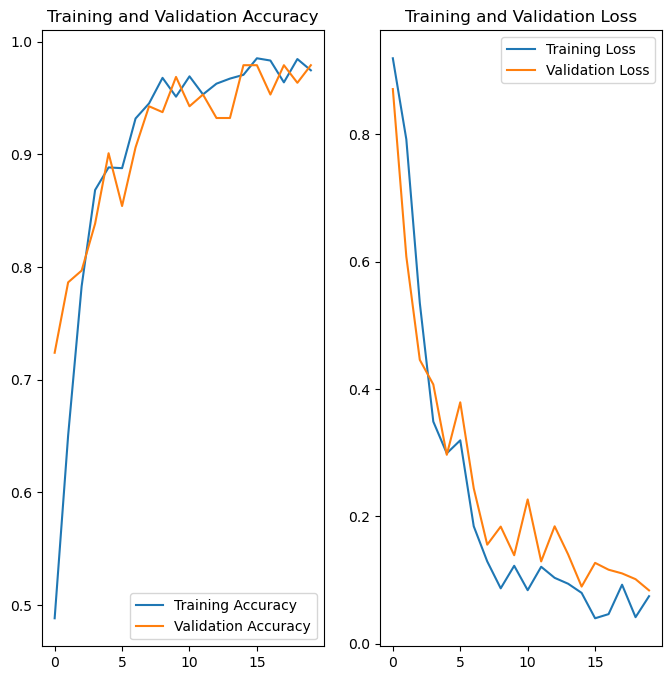

In [20]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 70ms/step
predicted label: Potato___Late_blight


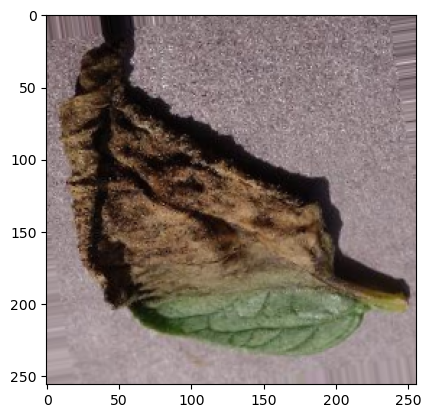

In [21]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 11ms/step


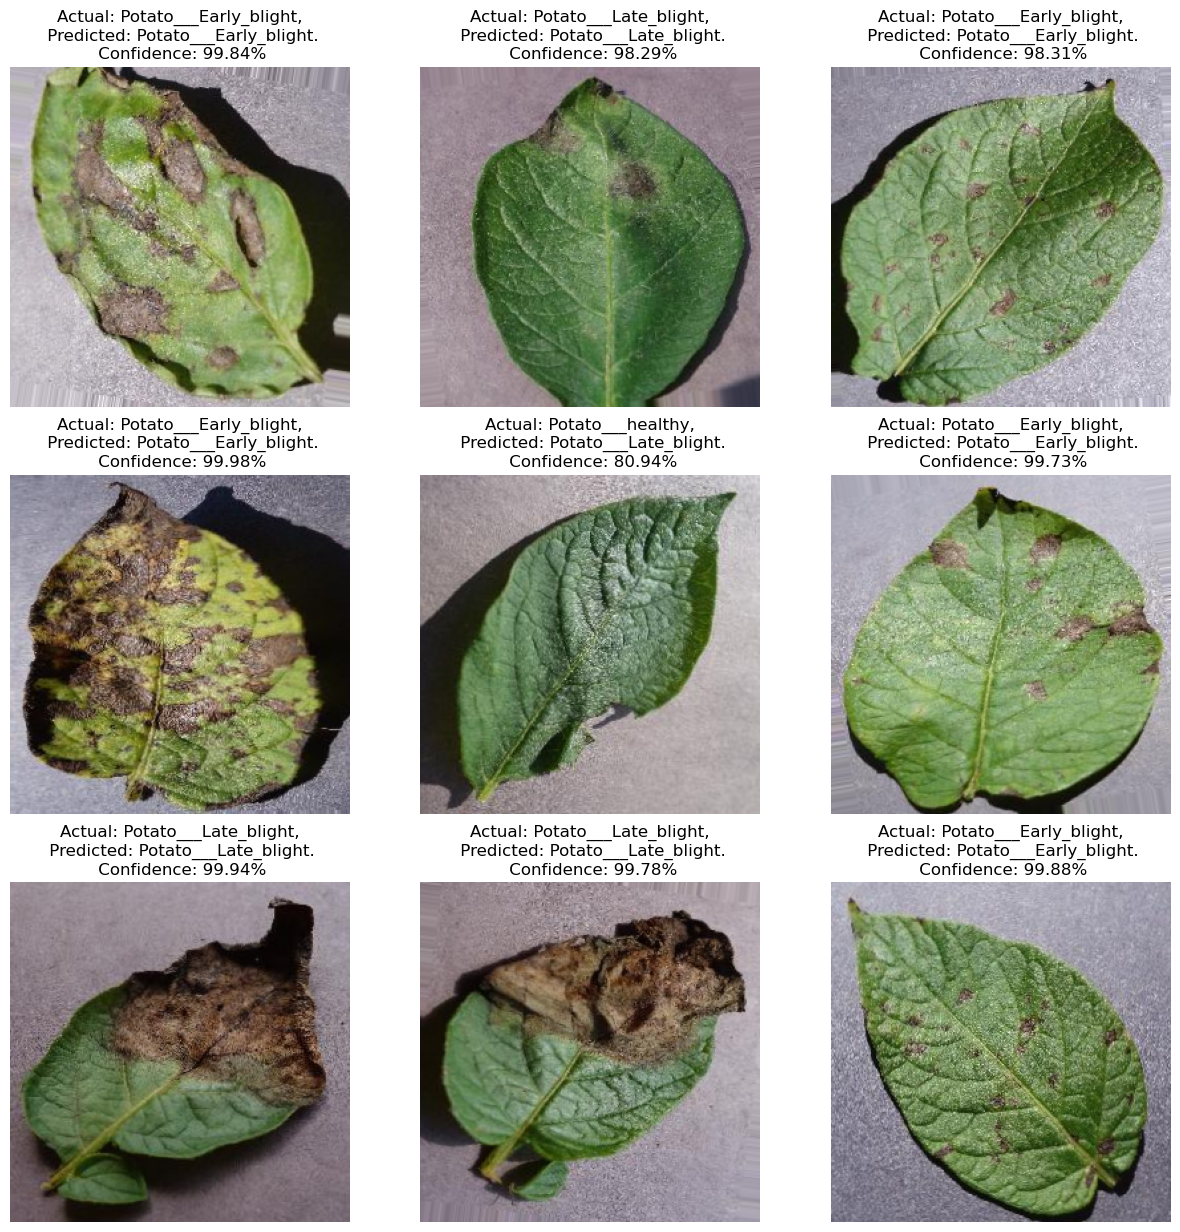

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [24]:
model.save("../potato.h5")

In [25]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

model = load_model('potts.h5')

test_dir = 'PlantVillage_Split/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Set your image dimensions
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle for confusion matrix
)

Found 215 images belonging to 3 classes.


In [26]:
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

215/215 [==============================] - 1s 3ms/step


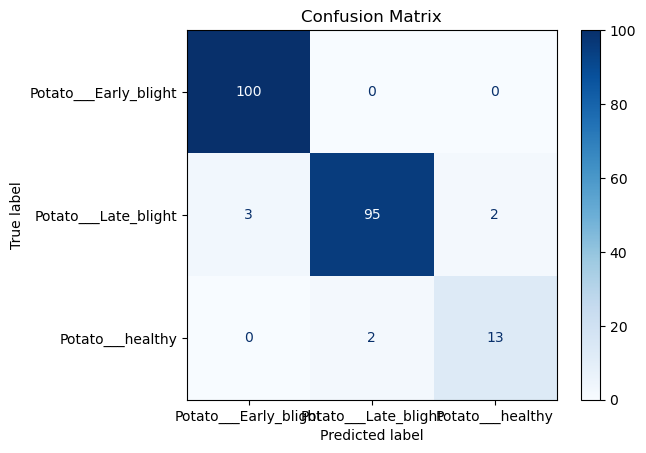

In [27]:
cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()